## Prepare Notebook

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

## Generate Sample Data 

In [2]:
def generate_circle_sample_data(r, n, sigma):

    angles = np.random.uniform(low=0, high=2*np.pi, size=n)

    x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    x = r*np.cos(angles) + x_epsilon
    y = r*np.sin(angles) + y_epsilon
    
    return x, y

In [3]:
n_c_samples = 300
sigma=0.2

x1, y1 = generate_circle_sample_data(2, n_c_samples, sigma)
x2, y2 = generate_circle_sample_data(4, n_c_samples, sigma)
x3, y3 = generate_circle_sample_data(6, n_c_samples, sigma)


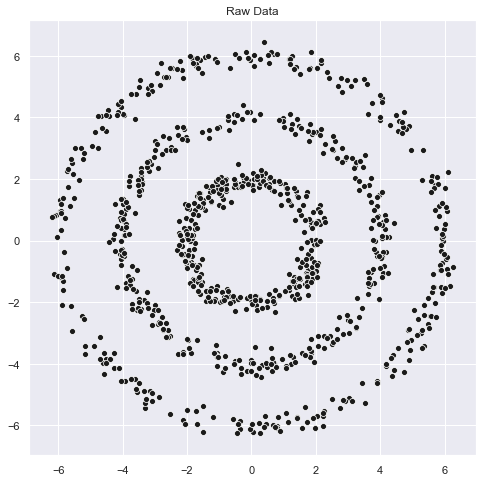

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(x=x1, y=y1, ax=ax, color='k')
sns.scatterplot(x=x2, y=y2, ax=ax, color='k')
sns.scatterplot(x=x3, y=y3, ax=ax, color='k')

ax.set(title='Raw Data');

## Add Labeled Data 

In [5]:
# Set number of classes.
n_c = 3
# Set number of labeled samples per class
n_c_ex = 20
# Total number og labeled samples. 
n_ex = n_c*n_c_ex
# Generate labeled data.
q1, p1 = generate_circle_sample_data(2, n_c_ex, sigma)
q2, p2 = generate_circle_sample_data(4, n_c_ex, sigma)
q3, p3 = generate_circle_sample_data(6, n_c_ex, sigma)

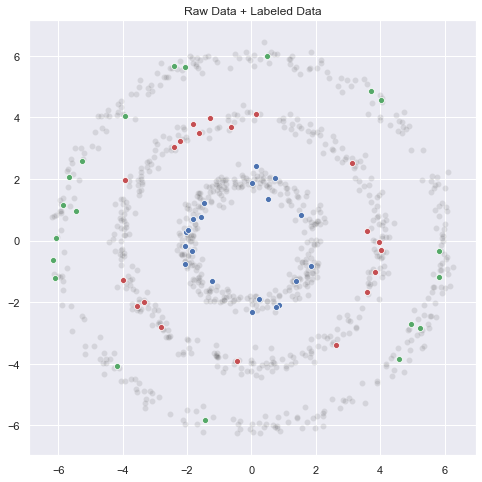

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(x=x1, y=y1, ax=ax, color='k', alpha=0.1)
sns.scatterplot(x=x2, y=y2, ax=ax, color='k', alpha=0.1)
sns.scatterplot(x=x3, y=y3, ax=ax, color='k', alpha=0.1)

sns.scatterplot(x=q1, y=p1, ax=ax, color='b')
sns.scatterplot(x=q2, y=p2, ax=ax, color='r')
sns.scatterplot(x=q3, y=p3, ax=ax, color='g')

ax.set(title='Raw Data + Labeled Data');

In [7]:
# Merge Data  
x = np.concatenate([x1, x2, x3, q1, q2, q3]).reshape(-1, 1)
y = np.concatenate([y1, y2, y3, p1, p2, p3]).reshape(-1, 1)

data_matrix = np.concatenate([x, y], axis=1)

In [8]:
n = data_matrix.shape[0]

n == n_c*(n_c_samples + n_c_ex)

True

In [9]:
n

960

## Generate Adjacency Matrix

In [10]:
from sklearn.neighbors import kneighbors_graph

adjacency_matrix_s = kneighbors_graph(X=data_matrix,n_neighbors=15)

In [11]:
from scipy import sparse

adjacency_matrix = adjacency_matrix_s.toarray()

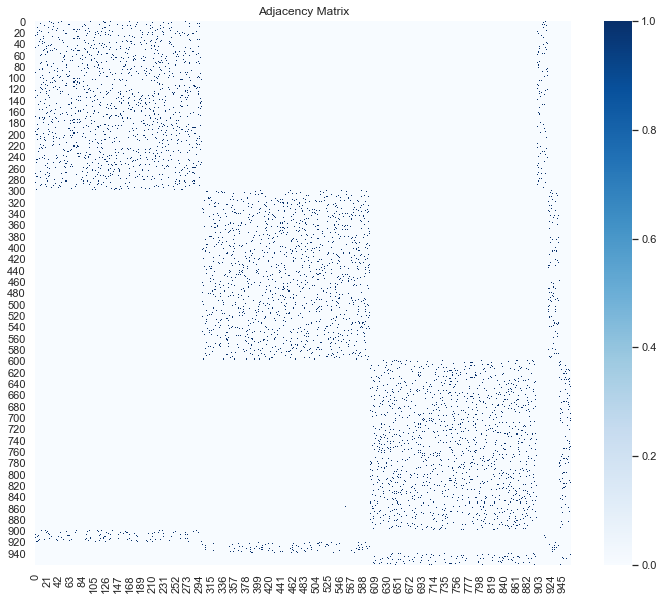

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(adjacency_matrix, ax=ax, cmap='Blues')

ax.set(title='Adjacency Matrix');

## Generate Graph Laplacian

In [13]:
graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)

In [14]:
graph_laplacian = graph_laplacian_s.toarray()

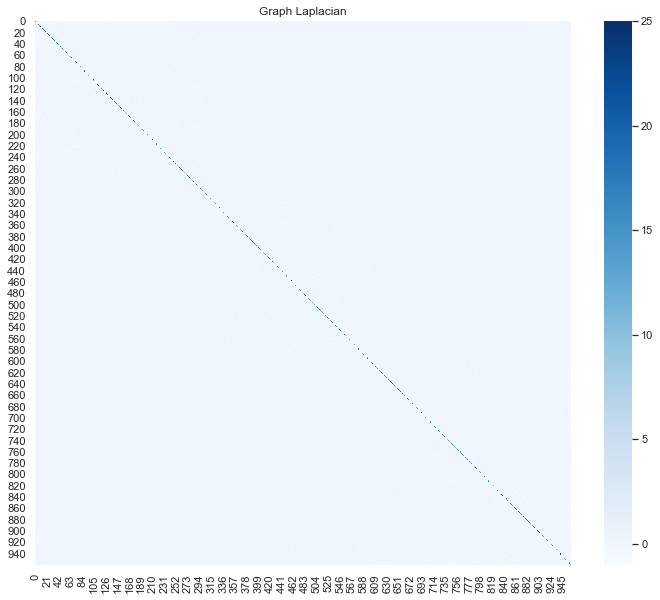

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))

sns.heatmap(graph_laplacian, ax=ax, cmap='Blues')

ax.set(title='Graph Laplacian');

## Learning Problem Description

## Construct Loss Function

In [16]:
u_obs = np.zeros(shape=(n_ex, n_c))

u_obs[0:n_c_ex, 0] = 1
u_obs[n_c_ex:2*n_c_ex, 1] = 1
u_obs[2*n_c_ex:3*n_c_ex, 2] = 1

u_obs

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [17]:
label_index = np.arange(start=n_c*n_c_samples, stop=n)

In [18]:
u = np.zeros(shape=(n, n_c))

def project_to_labeled(u, label_index):
    
    return u[label_index, :]

u_proj = project_to_labeled(u, label_index)

In [19]:
from scipy.special import softmax

def sofmax_loss(c, c_obs):
    
    m = c.shape[0]
    
    soft_max = np.apply_along_axis(softmax, axis=1, arr=c)
    
    loss = - (1/m)*np.dot(u_obs.T, np.log(soft_max))

    loss = np.trace(loss)
    
    return loss

In [20]:
def laplacial_loss(c, graph_laplacian):
    
    loss = 0.5*np.dot(c.T, np.dot(graph_laplacian, c))
    
    loss = np.trace(loss)
    
    return loss

In [21]:
def loss(u, u_obs, label_index, graph_laplacian, alpha):
    
    u_proj = project_to_labeled(u, label_index)
    
    loss = laplacial_loss(u, graph_laplacian) + (alpha/2)*sofmax_loss(u_proj, u_obs)
    
    return loss

In [22]:
loss(u, u_obs, label_index, graph_laplacian, alpha=0.1)

0.05493061443340548

## Run Optimizer

## Predict Classes 

In [23]:
u0 = np.ones(shape=(n, n_c)) / 0.5

In [24]:
from scipy.optimize import minimize

u0 = u

optimizer_result = minimize(
    fun = lambda x: loss(x.reshape(n, n_c), u_obs, label_index, graph_laplacian, 0.1), 
    x0=u0.flatten(), 
    options={'disp': True}
)

/Users/juanitorduz/anaconda3/envs/bms_summer19/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


         Current function value: -0.166551
         Iterations: 5
         Function evaluations: 340088
         Gradient evaluations: 118


In [25]:
r = np.apply_along_axis(softmax, axis=1, arr=optimizer_result.x.reshape(n, n_c))

In [26]:
rr = np.argmax(a=r, axis=1)
rr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

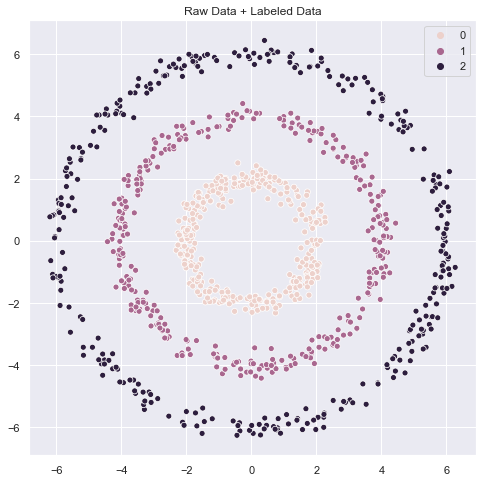

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(x=data_matrix[:, 0], y=data_matrix[:, 1], hue=rr)

ax.set(title='Raw Data + Labeled Data');

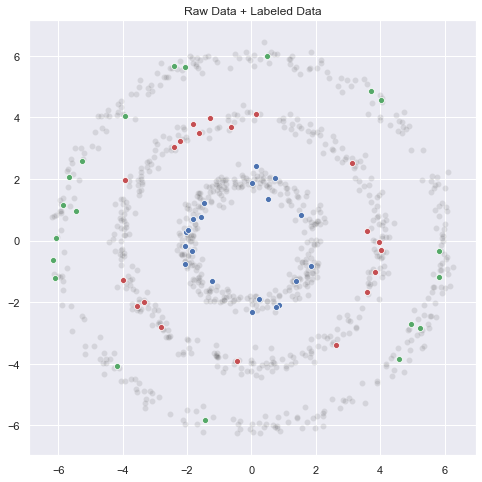

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.scatterplot(x=x1, y=y1, ax=ax, color='k', alpha=0.1)
sns.scatterplot(x=x2, y=y2, ax=ax, color='k', alpha=0.1)
sns.scatterplot(x=x3, y=y3, ax=ax, color='k', alpha=0.1)

sns.scatterplot(x=q1, y=p1, ax=ax, color='b')
sns.scatterplot(x=q2, y=p2, ax=ax, color='r')
sns.scatterplot(x=q3, y=p3, ax=ax, color='g')

ax.set(title='Raw Data + Labeled Data');